In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [35]:
df = pd.read_csv('Admission_Predict.csv')

In [36]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [37]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [38]:
from sklearn.preprocessing import Binarizer
bi =Binarizer(threshold=0.75)
x = df['Chance of Admit ']
x= pd.DataFrame(x)
df['Chance of Admit ']=bi.fit_transform(x)

In [39]:
x= df.drop(['Chance of Admit '],axis=1)
y = df['Chance of Admit ']
x= pd.DataFrame(x)
# y = pd.DataFrame(y)


<AxesSubplot:xlabel='Chance of Admit ', ylabel='count'>

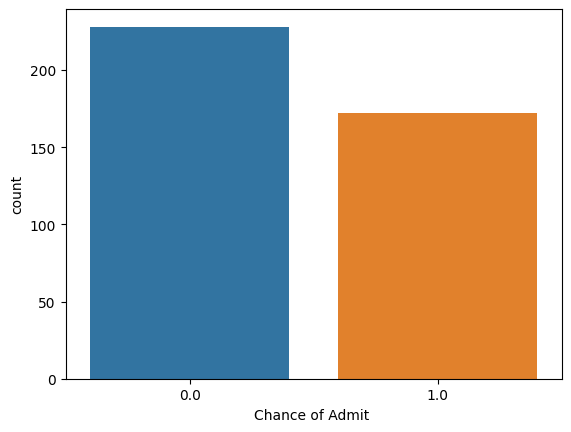

In [40]:

sns.countplot(x=y)



In [41]:
y.value_counts()

0.0    228
1.0    172
Name: Chance of Admit , dtype: int64

In [42]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,random_state=42,test_size=0.25)


In [43]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(random_state=0)

DTC.fit(X_train,Y_train)



DecisionTreeClassifier(random_state=0)

In [44]:
y_pred = DTC.predict(X_test)

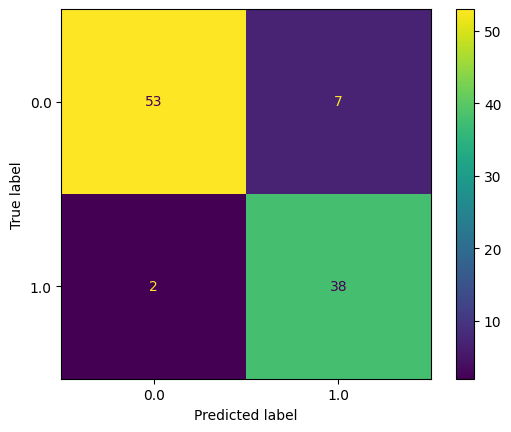

In [45]:
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,classification_report

ConfusionMatrixDisplay.from_predictions(Y_test,y_pred)


In [47]:

print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.88      0.92        60
         1.0       0.84      0.95      0.89        40

    accuracy                           0.91       100
   macro avg       0.90      0.92      0.91       100
weighted avg       0.92      0.91      0.91       100



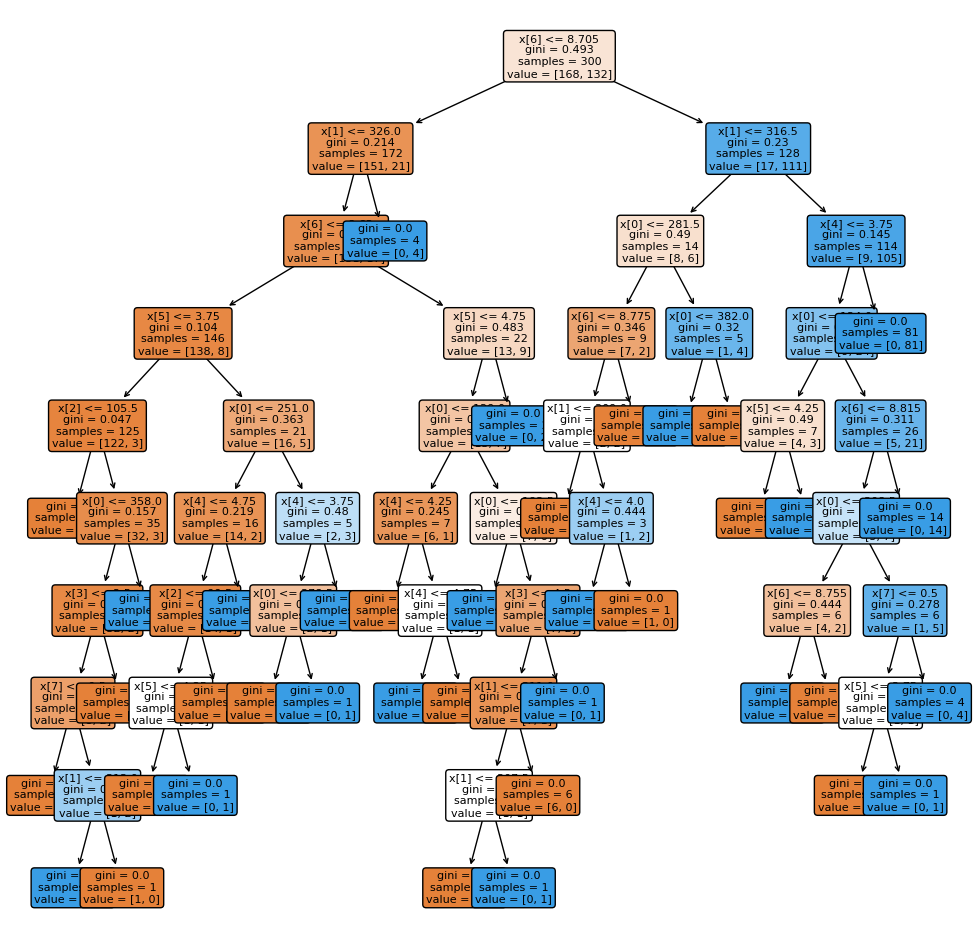

In [50]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,12))
plot_tree(DTC,fontsize=8,filled=True,rounded=True)
plt.show()